In [3]:
# 2. Load dataset
# ===============================================================
df = pd.read_csv(r"D:\desktop - new\Bitcoin\bitcoin_data.csv")
print(df.head())

       Date        Close         High          Low         Open       Volume
0  1/1/2017   998.325012  1003.080017   958.698975   963.658020  147775008.0
1  1/2/2017  1021.750000  1031.390015   996.702026   998.617004  222184992.0
2  1/3/2017  1043.839966  1044.079956  1021.599976  1021.599976  185168000.0
3  1/4/2017  1154.729980  1159.420044  1044.400024  1044.400024  344945984.0
4  1/5/2017  1013.380005  1191.099976   910.416992  1156.729980  510199008.0


In [4]:
# 3. Basic cleaning
# ===============================================================
# Convert date column
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.sort_values('Date')
df = df.dropna(subset=['Close'])

In [5]:
# 4. Compute log returns and volatility proxy
# ===============================================================
df['Log_Return'] = np.log(df['Close'] / df['Close'].shift(1))
df['Volatility'] = df['Log_Return'].rolling(window=7).std() * np.sqrt(365)  # annualized weekly volatility
df = df.dropna()

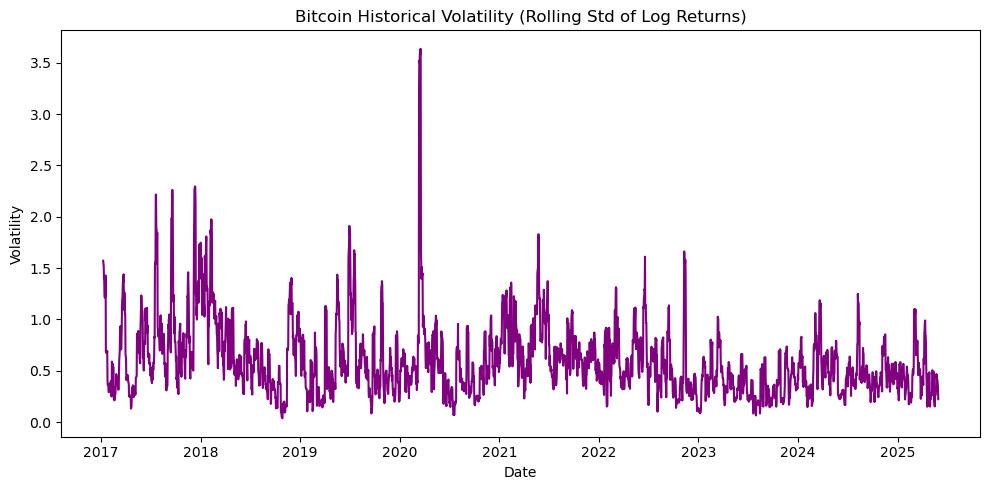

In [19]:
# 5. Visualize volatility
# ===============================================================
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Volatility'], color='purple')
plt.title("Bitcoin Historical Volatility (Rolling Std of Log Returns)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.tight_layout()
#plt.savefig("arima_charts/bitcoin_volatility_timeseries.png", dpi=300, bbox_inches="tight")
plt.show()

In [7]:
# 6. Split data into train/test
# ===============================================================
train_size = int(len(df) * 0.8)
train, test = df['Volatility'][:train_size], df['Volatility'][train_size:]

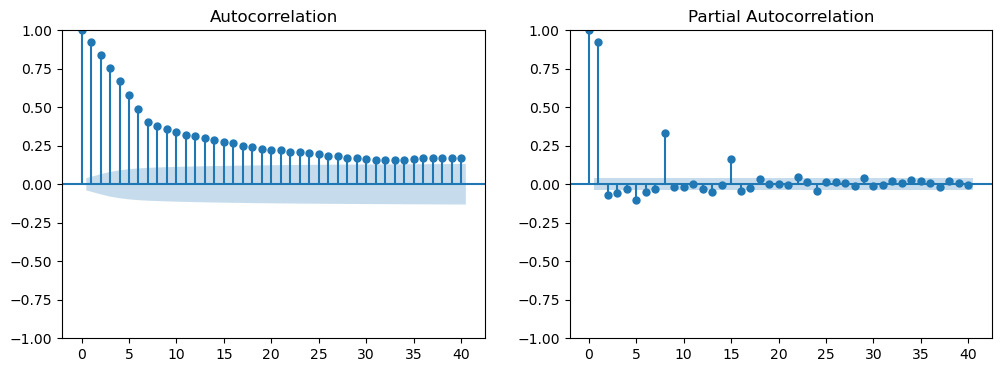

In [17]:
# 7. Plot ACF and PACF (to identify ARIMA parameters)
# ===============================================================
fig, axes = plt.subplots(1, 2, figsize=(12,4))
plot_acf(train, ax=axes[0], lags=40)
plot_pacf(train, ax=axes[1], lags=40)
#plt.savefig("arima_charts/bitcoin_volatility_timeseries.png", dpi=300, bbox_inches="tight")
plt.show()

In [10]:
# 8. Fit ARIMA model (you can tune p,d,q)
# ===============================================================
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

# ===============================================================
# 9. Forecast volatility
# ===============================================================
forecast_steps = len(test)
forecast = model_fit.forecast(steps=forecast_steps)
# 10. Evaluate model
# ===============================================================
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"\nRMSE on test data: {rmse:.6f}")


                               SARIMAX Results                                
Dep. Variable:             Volatility   No. Observations:                 2452
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1115.718
Date:                Sat, 25 Oct 2025   AIC                          -2225.435
Time:                        22:46:17   BIC                          -2208.023
Sample:                             0   HQIC                         -2219.107
                               - 2452                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1908      0.734      0.260      0.795      -1.248       1.630
ma.L1         -0.1588      0.738     -0.215      0.830      -1.605       1.287
sigma2         0.0236      0.000    166.405      0.0

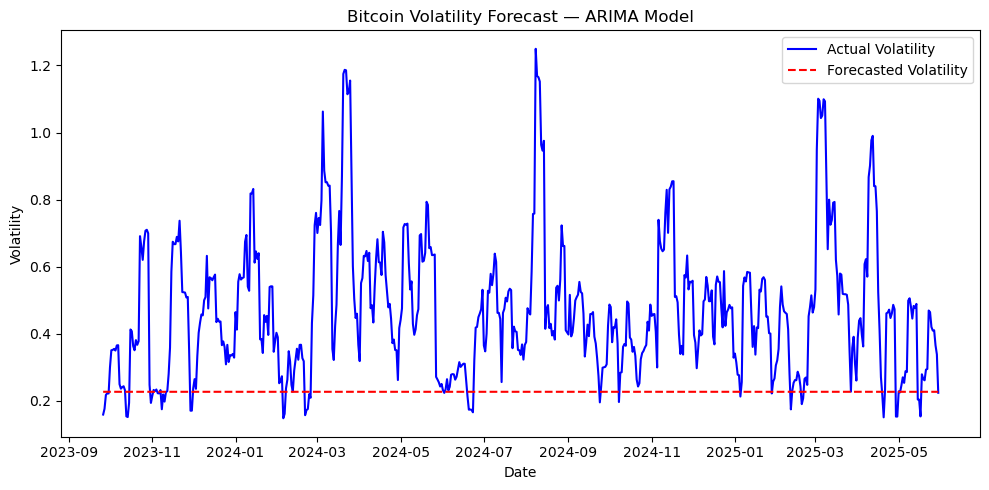

In [11]:
# 11. Plot actual vs forecasted volatility
# ===============================================================
plt.figure(figsize=(10,5))
plt.plot(df['Date'][train_size:], test, label='Actual Volatility', color='blue')
plt.plot(df['Date'][train_size:], forecast, label='Forecasted Volatility', color='red', linestyle='--')
plt.title("Bitcoin Volatility Forecast — ARIMA Model")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.tight_layout()
plt.show()

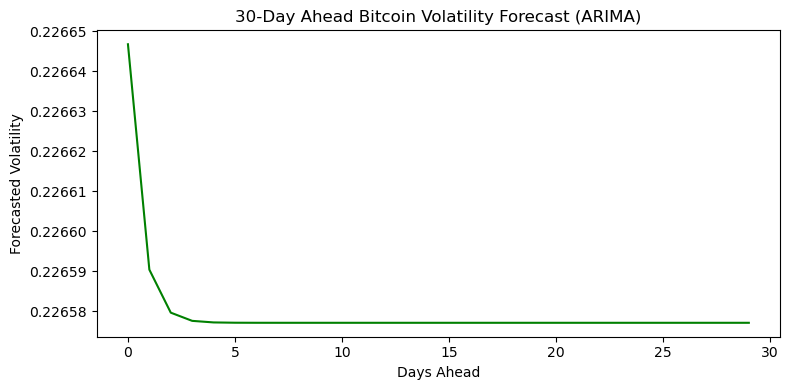

In [12]:
# 12. Forecast next 30 days
# ===============================================================
future_forecast = model_fit.forecast(steps=30)
plt.figure(figsize=(8,4))
plt.plot(range(30), future_forecast, color='green')
plt.title("30-Day Ahead Bitcoin Volatility Forecast (ARIMA)")
plt.xlabel("Days Ahead")
plt.ylabel("Forecasted Volatility")
plt.tight_layout()
plt.show()

In [14]:
rmse = np.sqrt(mean_squared_error(test, forecast))

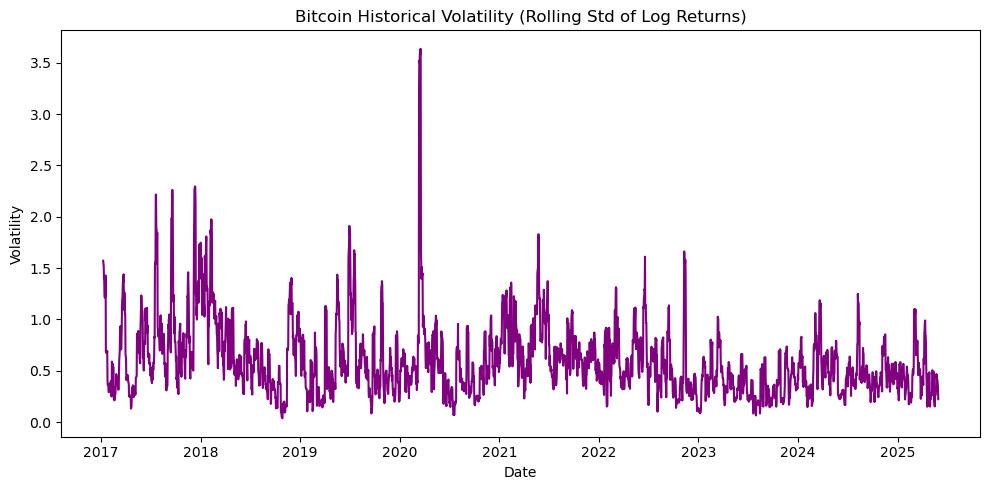

                               SARIMAX Results                                
Dep. Variable:             Volatility   No. Observations:                 2452
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1115.718
Date:                Sat, 25 Oct 2025   AIC                          -2225.435
Time:                        23:09:15   BIC                          -2208.023
Sample:                             0   HQIC                         -2219.107
                               - 2452                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1908      0.734      0.260      0.795      -1.248       1.630
ma.L1         -0.1588      0.738     -0.215      0.830      -1.605       1.287
sigma2         0.0236      0.000    166.405      0.0

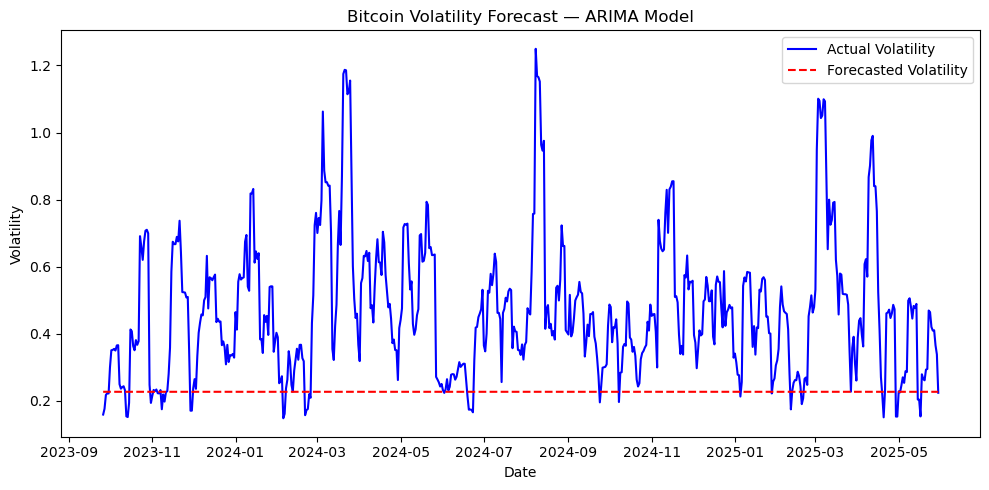

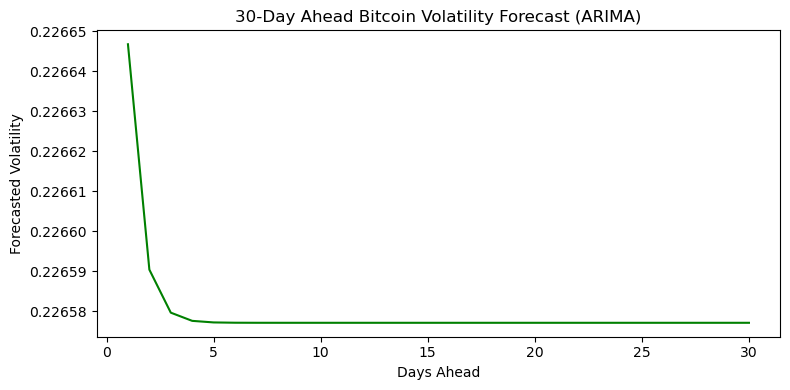

In [20]:
# ===============================================================
# 1. Import required libraries
# ===============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
import os
warnings.filterwarnings("ignore")

# ===============================================================
# 2. Load dataset
# ===============================================================
df = pd.read_csv(r"D:\desktop - new\Bitcoin\bitcoin_data.csv")
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.sort_values('Date').dropna(subset=['Close'])

# ===============================================================
# 3. Compute log returns and volatility
# ===============================================================
df['Log_Return'] = np.log(df['Close'] / df['Close'].shift(1))
df['Volatility'] = df['Log_Return'].rolling(window=7).std() * np.sqrt(365)
df = df.dropna()

# ===============================================================
# 4. Create folder for saving charts
# ===============================================================
os.makedirs("arima_charts", exist_ok=True)

# ===============================================================
# 5. Plot volatility
# ===============================================================
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Volatility'], color='purple')
plt.title("Bitcoin Historical Volatility (Rolling Std of Log Returns)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.tight_layout()
plt.savefig("arima_charts/bitcoin_volatility_timeseries.png", dpi=300, bbox_inches="tight")
plt.show()

# ===============================================================
# 6. Split data
# ===============================================================
train_size = int(len(df) * 0.8)
train, test = df['Volatility'][:train_size], df['Volatility'][train_size:]

# ===============================================================
# 7. Fit ARIMA model
# ===============================================================
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

# ===============================================================
# 8. Forecast and evaluate
# ===============================================================
forecast_steps = len(test)
forecast = model_fit.forecast(steps=forecast_steps)
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"RMSE on test data: {rmse:.6f}")

# ===============================================================
# 9. Actual vs Forecast Plot
# ===============================================================
plt.figure(figsize=(10,5))
plt.plot(df['Date'][train_size:], test, label='Actual Volatility', color='blue')
plt.plot(df['Date'][train_size:], forecast, label='Forecasted Volatility', color='red', linestyle='--')
plt.title("Bitcoin Volatility Forecast — ARIMA Model")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.tight_layout()
plt.savefig("arima_charts/bitcoin_volatility_forecast.png", dpi=300, bbox_inches="tight")
plt.show()

# ===============================================================
# 10. 30-Day Forecast Plot
# ===============================================================
future_forecast = model_fit.forecast(steps=30)
plt.figure(figsize=(8,4))
plt.plot(range(1, 31), future_forecast, color='green')
plt.title("30-Day Ahead Bitcoin Volatility Forecast (ARIMA)")
plt.xlabel("Days Ahead")
plt.ylabel("Forecasted Volatility")
plt.tight_layout()
plt.savefig("arima_charts/bitcoin_30day_volatility_forecast.png", dpi=300, bbox_inches="tight")
plt.show()


In [21]:
plt.savefig("arima_charts/bitcoin_30day_volatility_forecast.png", dpi=300, bbox_inches="tight")


<Figure size 640x480 with 0 Axes>